In [1]:
# Importing Libraries
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 
import random

# Importing Library for Data Visualization
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2

# Importing Tensorflow for model creation and its dependencies
import tensorflow as tf

# for enabling inline plotting
%matplotlib inline

2024-07-12 21:01:50.227929: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 21:01:50.228030: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 21:01:50.405909: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# !pip install --upgrade tensorflow keras

In [3]:

import tensorflow as tf


In [4]:
TrainingImagePath= "/kaggle/input/ball-prediction11/train"
TestingImagePath  = "/kaggle/input/ball-prediction11/test"
ValidationImagePath = "/kaggle/input/ball-prediction11/valid"

In [5]:
# Defining pre-processing transformations on raw images of training data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

# Generating the Testing Data
valid_set = test_datagen.flow_from_directory(
        ValidationImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 650 images belonging to 13 classes.
Found 65 images belonging to 13 classes.
Found 65 images belonging to 13 classes.


In [6]:
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [7]:
# valid_set = test_datagen.flow_from_directory(valid_image_path,
#                                              target_size=(128,128),
#                                              batch_size = 32,
#                                              class_mode = "categorical")

In [8]:
# train_set = train_datagen.flow_from_directory(training_image_path,
#                                              target_size=(128,128),
#                                              batch_size = 32,
#                                              class_mode = "categorical")

In [9]:
# test_set = test_datagen.flow_from_directory(testing_image_path,
#                                              target_size=(128,128),
#                                              batch_size = 32,
#                                              class_mode = "categorical")

In [10]:
test_set.class_indices

{'american football': 0,
 'baseball': 1,
 'basketball': 2,
 'beachballs': 3,
 'billiard ball': 4,
 'bowling ball': 5,
 'cricket ball': 6,
 'eyeballs': 7,
 'football': 8,
 'golf ball': 9,
 'marble': 10,
 'tennis ball': 11,
 'volley ball': 12}

In [11]:
'''#################### Creating lookup table for all balls ##############################'''
# class_indices have the numeric tag for each balls
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for ballValue,ballName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[ballValue]=ballName

# Saving the face map for future reference
import pickle
with open(R"E:\Data Sets\Balls Classification\ResultsMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'american football', 1: 'baseball', 2: 'basketball', 3: 'beachballs', 4: 'billiard ball', 5: 'bowling ball', 6: 'cricket ball', 7: 'eyeballs', 8: 'football', 9: 'golf ball', 10: 'marble', 11: 'tennis ball', 12: 'volley ball'}

 The Number of output neurons:  13


In [12]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense

In [13]:
import keras

In [14]:
model = Sequential()

In [15]:
model.add(keras.Input(shape=(128,128,3)))

In [16]:
model.add(Convolution2D(32,
                       kernel_size=(3,3),
                       strides=(1,1),
                        
                        activation='relu'))

In [17]:
model.add(MaxPool2D(pool_size=(2,2)))

In [18]:
model.add(Convolution2D(64,
                        kernel_size=(3,3),
                        strides=(1,1),
                        activation='relu'
                       ))

In [19]:
model.add(MaxPool2D(pool_size=(2,2)))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(256,activation='relu'))

In [22]:
model.add(Dense(13,activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         3,341 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,768,589 (56.34 MB)

 Trainable params: 14,768,589 (56.34 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_history =model.fit(training_set,
                         epochs=50,
          validation_data=valid_set,
          verbose=1)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/21 ━━━━━━━━━━━━━━━━━━━━ 2:49 8s/step - accuracy: 0.0312 - loss: 2.5828

I0000 00:00:1720818132.430802      93 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720818132.451152      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.1549 - loss: 3.3403

W0000 00:00:1720818139.152034      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 369ms/step - accuracy: 0.1559 - loss: 3.3151 - val_accuracy: 0.2615 - val_loss: 2.3804
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.3399 - loss: 2.0521 - val_accuracy: 0.4615 - val_loss: 1.7585
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4998 - loss: 1.6558 - val_accuracy: 0.5231 - val_loss: 1.5791
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6187 - loss: 1.3123 - val_accuracy: 0.6308 - val_loss: 1.2787
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.6837 - loss: 1.0207 - val_accuracy: 0.5692 - val_loss: 1.4165
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6926 - loss: 0.9266 - val_accuracy: 0.6462 - val_loss: 1.0839
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7688 - loss: 0.7680 - val_accuracy: 0.7077 - val_loss: 0.9522
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7831 - loss: 0.6311 - val_accuracy: 0.6462 - val

In [26]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

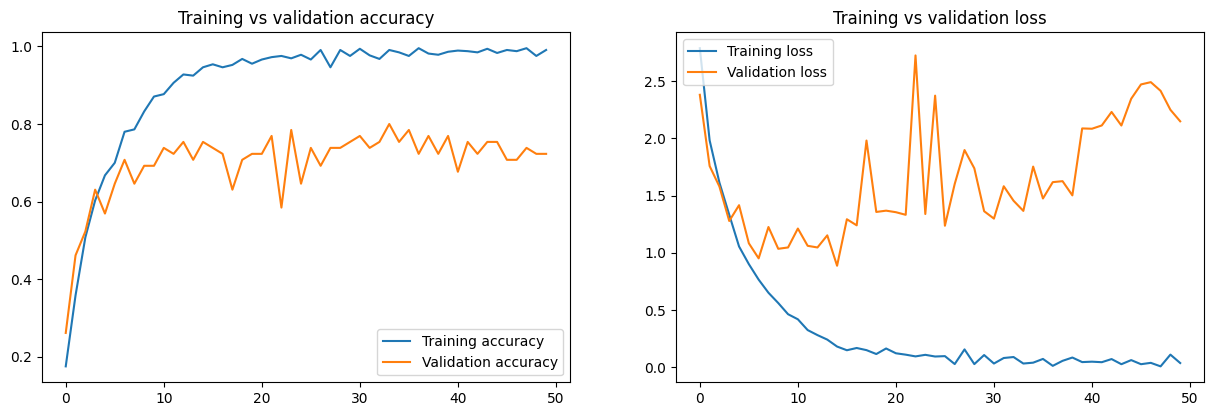

In [27]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [28]:

model.save("/kaggle/working/using_simple_Conv_layers.h5")

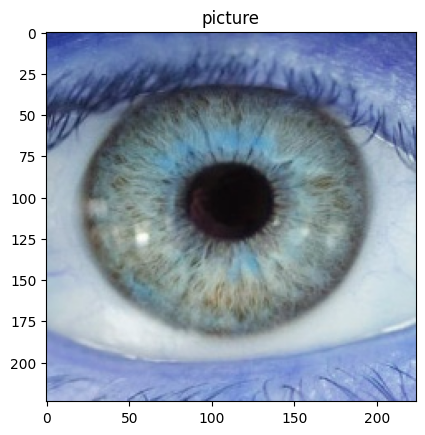

########################################
Prediction is:  eyeballs


In [29]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage=R"/kaggle/input/ball-prediction11/test/eyeballs/1.jpg"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])